<a href="https://colab.research.google.com/github/er-abd/Further-Education-College-Database/blob/main/MyLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

Reading data from the census11sample.csv file into a dataframe.


In [47]:
import pandas as pd
import numpy as np
population_data = pd.read_csv("census11sample.csv", index_col =[0])
population_data

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


## Divide the data (2 marks)

We split the data in to two parts:

1- A set for exploration and hythesis generation (my_explore_sample)

2- A set on which to test the hypothesis (my_test_sample)

To make sure the two sets of data are representative we can use a method like train_test_split from the sklearn.model_selection module. Otherwise, splitting based on row indices might enforce some bias as the original dataset might be ordered in a specific way.

In [48]:
from sklearn.model_selection import train_test_split
my_explore_sample, my_test_sample = train_test_split(population_data, test_size=0.5, random_state = 1 )

## Explore the data (5 marks)

### Measure descriptive statistics:
 

In [49]:
description = my_explore_sample.describe().drop(['25%', '75%', 'min', 'max', 'count'])
description.rename(index={'50%': 'Median'})


,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
mean,39.792000,39.128000,39.136000,37.98400,39.796000,41.30600,34.834000,39.908000,43.342000
std,23.818383,23.160406,23.803755,23.82484,23.302111,23.64874,22.444285,23.041644,24.431267
Median,40.000000,40.000000,39.000000,37.00000,40.000000,41.00000,32.000000,40.000000,44.000000


The statistical summary of our sample_explore tells us that:


*  London has the smallest standard deviation.
*  South West has the largest standard deviation.
*  London has the smallest mean.
*  South West has the largest mean.
*  London again has the smallest median.
*  South West again has the largest median.


### Plot a histogram:

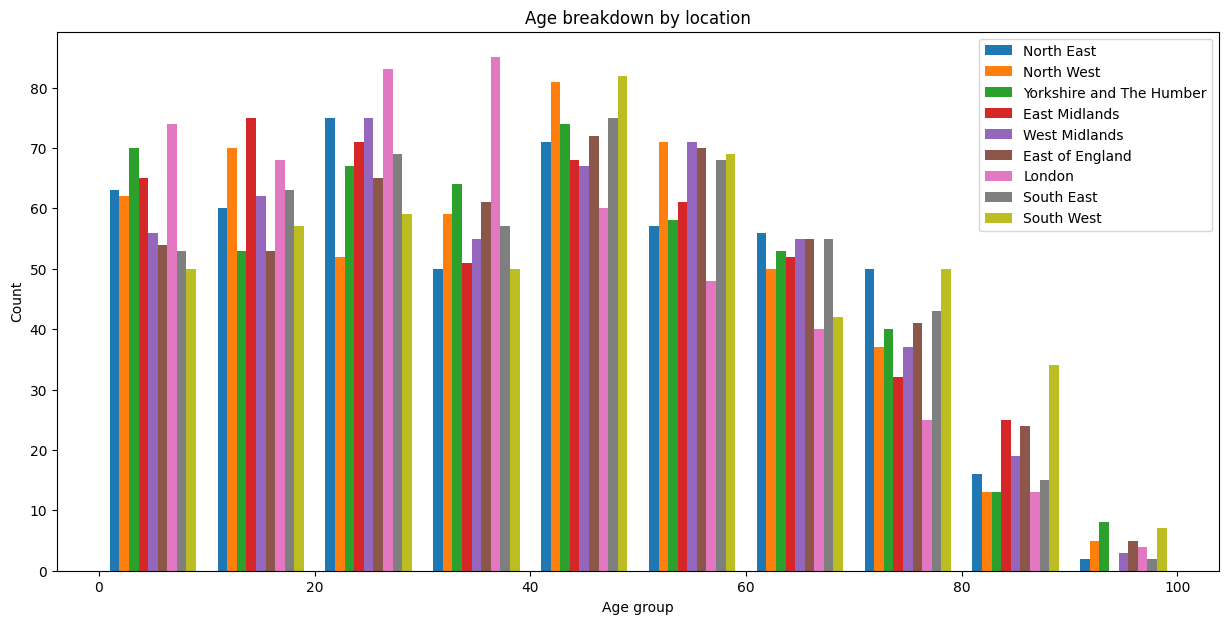

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.title("Age breakdown by location")
plt.hist(my_explore_sample)
# plt.xticks([])
plt.xlabel("Age group")
plt.ylabel("Count")
plt.legend(my_explore_sample.columns)

plt.show()

We can see from the above histogram that the older the age group is, the greater the number of people from the South West compared to other locations.

### Plot a Box-Plot:

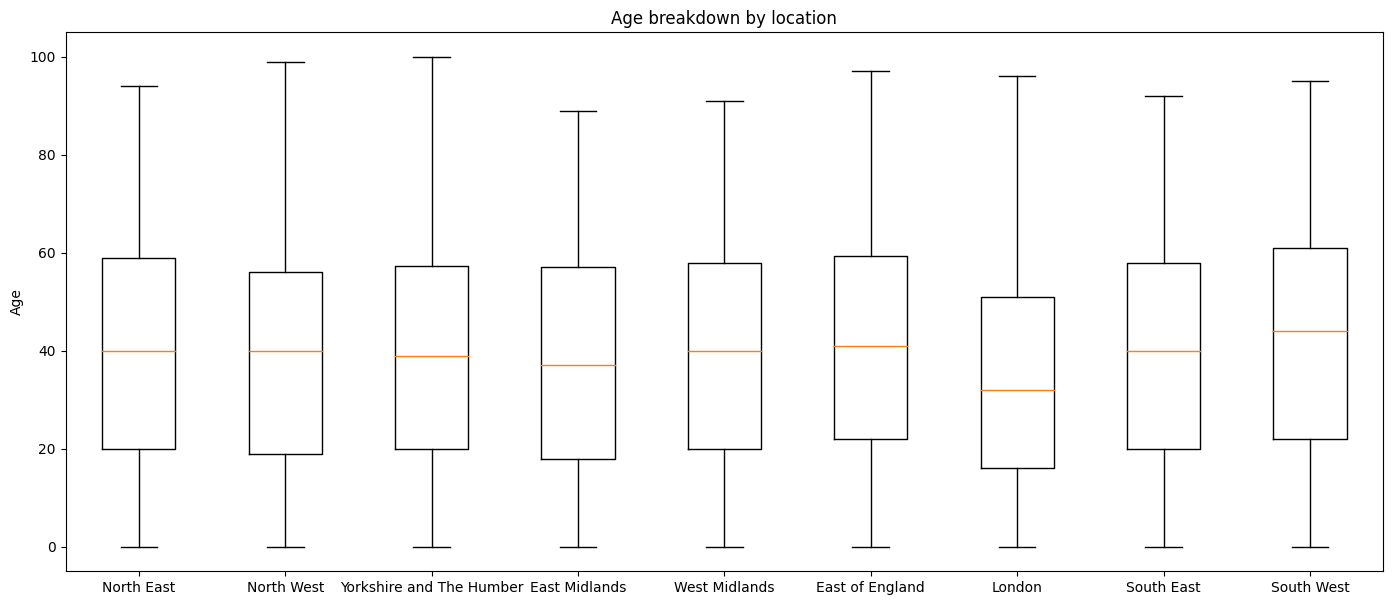

In [51]:
plt.figure(figsize=(17,7))
plt.title("Age breakdown by location")
plt.boxplot(my_explore_sample)
number_of_columns = len(my_explore_sample.columns)
plt.xticks(range(1, number_of_columns + 1), my_explore_sample.columns)
plt.ylabel("Age")
plt.show()

The above boxplot shows that South West has the largest median (the line in the middle of the box). That means the age of half of the people in South West is greater than the median, which in turn is the greatest compared to other locations. This confirms the previous observation which indicated that South West has the largest proportion of old people. The distance between the upper and the lower ends of the box informs us about the standard deviation. So from the above boxplot, we can tell that South west has the largest standard deviation.

### Plot a histogram (South West):

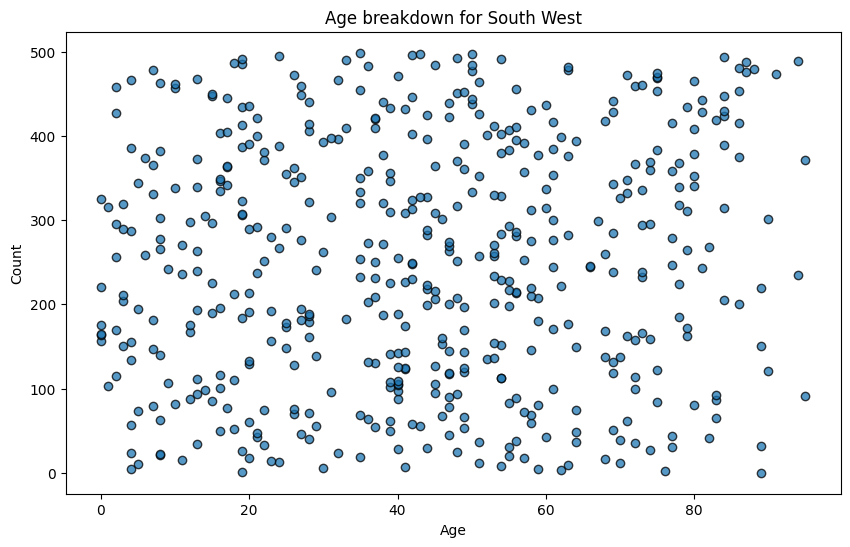

In [52]:
# plt.style.use("seaborn")

count = range(500)
ages = my_explore_sample["South West"]
plt.figure(figsize=(10,6))

plt.scatter(ages, count, edgecolors="black", linewidths=1, alpha=0.75)

# plt.xscale("log")
# plt.yscale("log")

plt.title("Age breakdown for South West")
plt.ylabel("Count")
plt.xlabel("Age")





plt.show()

The previous boxplot tells us that half of the people in the South West are 43 year and older. Therfore the distribution is heavily skewed towards older people. Therefore it makes more sence to use a logarithmic scale for the above scatter.

The above scatter shows us that a higer proportion of people in the South West are old.

array([[<Axes: title={'center': 'South West'}>]], dtype=object)

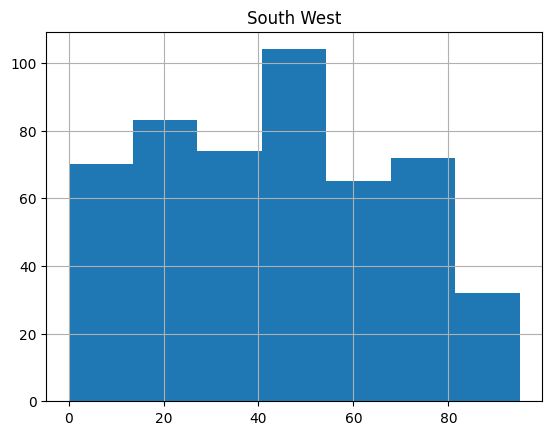

In [53]:
# plt.figure(figsize=(15,7))
# plt.title("Age breakdown by location")
# plt.hist(my_explore_sample["London"])
# plt.xlabel("Age group")
# plt.ylabel("Count")
# plt.show()


my_explore_sample.hist(column="South West", bins=7)

By looking at the bars, we can see that while many bars have similar heights, some bars are shorter than others. Therefore, the mean is moderately less than the average value of all these values (the ages). A realistic estimate of the mean would be a value between 40 and 50. We note that the above histogram is useful but it only provides some insights into the possible range of values for the mean. However, it does not the actual value of the mean. Another problem with histograms is that they can be affected by outliers

## State your hypothesis, and state the evidence that justifies it. (2 marks)

Based on the observations from the data exploration stage above, we can make the following observations:


1.   The South West has the highest median (from the boxplot).
2.   The South West has the highest mean (from the histogram).
3.   The South West has the standard deviation (from the boxplot).
4.   London exhibits contradictory behavior where it has the lowest median (from the boxplot), mean (from the histogram) and standard deviation (from the boxplot). 

Note that the above notes are approximate. The following hypothesis is based on these observations. Therefore, the hypothesis can be true or false and it can be falsified.

After considering the observations above, a reasonable hypothesis would be that **the South West has the highest mean value, while London has the lowest mean value.**



## Plan the test. (3 marks)

**Null hypothesis**: There is no difference between the mean of the South West region and the mean of London. (This is assumed to be true and we try to test against it.)

**Alternative Hypothesis**: The mean of the South West is greater than that of London.

Since the previous observations informed the alternative hypothesis that the mean of South West can be greater than the mean of London, we have to conduct an upper-tailed test.

**α-level**: A common choice for the α-level 5% or 0.05. Hence the confidence level (the probability level at which we role the null hypothesis out) is (1-α) = 1-0.05 = 0.95 or 95%.



## Perform the statistical test of the hypothesis. (5 marks)

Since the dataset size is large (more than 100), and we know the standard deviation, it is best to use a classical statistical testing methods known as the Z-test.

The null hypothesis: mean of South West = mean of London = 34.834000

The alternative hypothesis: mean of South West > mean of London. i.e  mean of South West > 34.834000


We also need to find the following data:
* The critical z-value for a 95% confidence level in an upper-tailed z-test.
* The mean of South West
* The std of South West
* The mean of London
* The size of the dataset

We can use the following formula:

z = (empirical mean - mean we are comapring to) / (empirical std / √num of points in dataset)


If we get a z-value that is greater than the critical z-value then we can reject the null hypothesis.




In [57]:
from scipy import stats


# get the values needed in the equation
alpha_level = 0.05
critical_value = 1 - alpha_level
southwest_std = my_test_sample["South West"].std()
london_mean = my_test_sample["London"].mean()
southwest_mean = my_test_sample["South West"].mean()
critical_z_value = stats.norm.ppf(1 - alpha_level)

# the equation
z_value = (southwest_mean - london_mean) / (southwest_std / np.sqrt(len(my_test_sample)))

print("The critical value for this test is: " + str(critical_value))
print("The found z-value is: " + str(z_value))

if(z_value > critical_value):
  print("Since the found z-value is greater than the critical z-value, we can reject the null hypothesis.")
  print("Hence, the mean of the South West is greater than the mean of London.")
else:
  print("Since the found z-value is NOT greater than the critical z-value, there is no enough evidence  to reject the null hypothesis.")
  print("Hence, there is no difference between the mean of the South West region and the mean of London. ")
  





The critical value for this test is: 0.95
The found z-value is: 5.798707077093195
Since the found z-value is greater than the critical z-value, we can reject the null hypothesis.
Hence, the mean of the South West is greater than the mean of London.


## Conclusions. (2 Marks) 

Using the method of Z-test for an upper-tailed test with a confidence level of 95%, we find that the null hypothesis can be ruled out.

## What to submit.

You will submit a Jupyter Notebook/Lab to GitLab. The notebook needs to have the same headings as this document, but only up to the conclusions section. I.e. every section with a mark associated with it. Fill in each section with the appropriate text, code, measurements and graphics to perform the required tasks. You can start with this document, and fill it in. 

 ***

## Useful tools and commands.

### Z-test and t-test
For a z-test, you will need properties from the normal distribution. For a t-test, you will need properties of the Student-t distribution. There are many to get these in python. One way is to use `scipy.stats`. You can `from scipy import stats` which gives you all of stats, or just import the normal distribution, which is called norm - `from scipy.stats import norm`, or import the t-distribution, `from scipy.stats import t`. 

In [55]:
from scipy import stats

For all distributions in `scipy.stats`, the method `.pdf` gives the probability distribution, `.cdf` gives the cumulative distribution, `.ppf` gives an inverse of the cdf (very useful), and `.interval` gives a confidence interval. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,10,0.05)
y=norm.pdf(x,5,1) # PDF of a normal distribution with mean 5 and variance 1
z=norm.cdf(x,5,1) # CDF of a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal PDF')
plt.plot(x,z,label='Normal CDF')
plt.legend()
plt.title('Normal distribution with mean 5 and var 1')
plt.show()

NameError: ignored

### Two-tailed test

The confidence interval is a function of $\alpha$ and is the smallest interval which contains $1-\alpha$ of the probability. For a two-tailed test, if the test statistic is outside the confidence interval, the null hypothesis is rejected; if it is inside the confidence interval, the null hypothesis is not rejected. All distributions in `scipy.stats` have a method `interval` which computes confidence interval.

In [ ]:
alpha = 0.05
x=np.arange(0,10,0.05)
y=stats.norm.pdf(x,5,1) # a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal pdf')
ci=stats.norm.interval(1-alpha,5,1)
print("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.plot([ci[0],ci[1]],[0.1,0.1],linewidth=2.0,label="95% Confidence interval")
plt.legend(loc=2)
plt.title("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.show()

### One tail test
Here is where `ppf` (the inverse of the cumulative distribution) is very useful. The lower tail critical value is where the cumulative distribution is equal to $\alpha$. The upper tail critical value is where the cumulative distribution is equal to $1-\alpha$. For a symmetric distribution (such as the normal or t distributions) the two critical values will be the same, but in general they will be different.

#### Lower tail and upper tail of a normal distribution with mean 5 and variance 1

In [ ]:
alpha = 0.05
lower = stats.norm.ppf(alpha,5,1)
upper = stats.norm.ppf(1-alpha,5,1)
plt.plot(x,y)
plt.plot([lower,lower],[0,0.2],label="Lower tail")
plt.plot([upper,upper],[0,0.2],label="Upper tail")
plt.legend()
plt.title("Lower and upper critical values")
plt.show()

The t-distribution works in a similar way, except the so-called "shape parameter" is the number of degrees of freedom, rather than the variance, and the location parameter (the mean) comes after the degrees of freedom.

In [ ]:
y10=stats.t.pdf(x,10,5)
y30=stats.t.pdf(x,30,5)
y100=stats.t.pdf(x,100,5)
plt.plot(x,y10,label="10 degrees of freedom")
plt.plot(x,y30,label="30 degrees of freedom")
plt.plot(x,y100,label="100 degrees of freedom")
plt.plot(x,y,label='Normal pdf')
plt.legend(loc=2)
plt.title("Various t-distributions; mean 5")
plt.show()

Notice how similar the t-distribution is to the normal distribution, even with the number of degrees of freedom as low as 10.

## Monte Carlo/Bootstrap sampling
If you want to do the statistics by generating samples from the data, you can use the method, `numpy.random.choice`. The first argument is the orginal data; the second argument is the size of the sample. The third argument is a boolean, determining with the sampling is with replacement or without replacement. By default, it does sampling with replacement, which is what you will need. 

In [ ]:
a=[1,2,3,4,5]
b=np.random.choice(a,4)
c=np.random.choice(a,4,replace=False) # sample without replacement. replace=True by default.
print(b)
print(c)

# The end!